In [15]:
from datetime import datetime

Date/time types in Python

In [3]:
d1 = datetime(2021, 11, 1)
d1

datetime.datetime(2021, 11, 1, 0, 0)

In [4]:
d2 = datetime(2021, 4, 3)
d2

datetime.datetime(2021, 4, 3, 0, 0)

In [8]:
diff = d1 - d2
diff

datetime.timedelta(days=212)

In [9]:
d3 = datetime(2012, 1, 5)
d3 + diff

datetime.datetime(2012, 8, 4, 0, 0)

In [10]:
d3.timestamp()

1325750400.0

In [12]:
datetime.fromtimestamp(123456)

datetime.datetime(1970, 1, 2, 2, 17, 36)

In [18]:
s = '2021-04-03'
s2 = '2021/04/03 13:24'

datetime.strptime(s, '%Y-%m-%d')

datetime.datetime(2021, 4, 3, 0, 0)

In [19]:
datetime.strptime(s2, '%Y/%m/%d %H:%M')

datetime.datetime(2021, 4, 3, 13, 24)

In [20]:
d3.strftime('%Y_____%m')

'2012_____01'

Pandas has its own type for date/time

In [23]:
import pandas as pd
import numpy as np

In [27]:
d = np.datetime64('2021-05-06')
d

numpy.datetime64('2021-05-06')

In [28]:
d+1

numpy.datetime64('2021-05-07')

In [29]:
pd.to_datetime('2021-05-01')

Timestamp('2021-05-01 00:00:00')

In [33]:
idx = pd.to_datetime(['2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04'])
idx

DatetimeIndex(['2021-05-01', '2021-05-02', '2021-05-03', '2021-05-04'], dtype='datetime64[ns]', freq=None)

In [34]:
df = pd.DataFrame(data={'price': [45, 47, 36, 27]}, index=idx)
df

,price
2021-05-01,45
2021-05-02,47
2021-05-03,36
2021-05-04,27


In [35]:
df.iloc[2]

price    36
Name: 2021-05-03 00:00:00, dtype: int64

In [36]:
df.loc['2021-05-03']

price    36
Name: 2021-05-03 00:00:00, dtype: int64

In [37]:
df.loc['2021-05-02':'2021-05-04':]

,price
2021-05-02,47
2021-05-03,36
2021-05-04,27


In [41]:
df1 = pd.read_csv('brent-daily.csv')
df1

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
...,...,...
8440,2020-08-18,45.34
8441,2020-08-19,45.21
8442,2020-08-20,44.56
8443,2020-08-21,43.94


In [47]:
df1 = pd.read_csv('brent-daily.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.set_index('Date')
df1


,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2020-08-18,45.34
2020-08-19,45.21
2020-08-20,44.56


In [48]:
df = pd.read_csv('brent-daily.csv', parse_dates=True, index_col='Date')
df

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63
...,...
2020-08-18,45.34
2020-08-19,45.21
2020-08-20,44.56


In [53]:
df.loc['2010-02-01':'2010-10-01']

,Price
Date,
2010-02-01,71.58
2010-02-02,73.94
2010-02-03,75.77
2010-02-04,71.30
2010-02-05,70.11
...,...
2010-09-27,77.71
2010-09-28,79.14
2010-09-29,78.79


<AxesSubplot:xlabel='Date'>

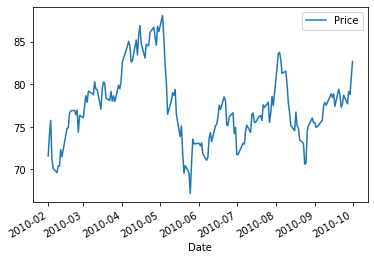

In [54]:
df2 = df.loc['2010-02-01':'2010-10-01']
df2.plot()

In [55]:
df3 = df2.resample('M').mean()
df3

,Price
Date,
2010-02-28,73.752105
2010-03-31,78.827391
2010-04-30,84.817619
2010-05-31,75.945500
2010-06-30,74.760909
2010-07-31,75.580000
2010-08-31,77.039545
2010-09-30,77.840476
2010-10-31,82.690000


Upsampling

In [56]:
df4 = df.loc['2010-02-01':'2010-02-10']

In [58]:
df5 = df4.resample('H').asfreq()
df5

,Price
Date,
2010-02-01 00:00:00,71.58
2010-02-01 01:00:00,NaN
2010-02-01 02:00:00,NaN
2010-02-01 03:00:00,NaN
2010-02-01 04:00:00,NaN
...,...
2010-02-09 20:00:00,NaN
2010-02-09 21:00:00,NaN
2010-02-09 22:00:00,NaN


<AxesSubplot:xlabel='Date'>

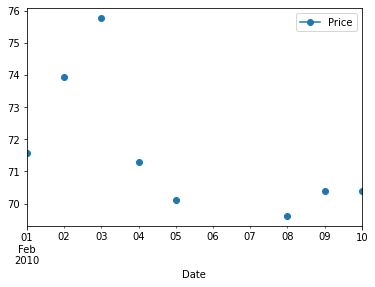

In [60]:
df5.plot(marker='o')

In [61]:
df6 = df4.resample('H').ffill()
df6

,Price
Date,
2010-02-01 00:00:00,71.58
2010-02-01 01:00:00,71.58
2010-02-01 02:00:00,71.58
2010-02-01 03:00:00,71.58
2010-02-01 04:00:00,71.58
...,...
2010-02-09 20:00:00,70.40
2010-02-09 21:00:00,70.40
2010-02-09 22:00:00,70.40


<AxesSubplot:xlabel='Date'>

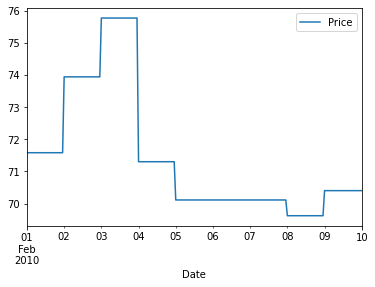

In [62]:
df6.plot()

In [63]:
df7 = df4.resample('H').interpolate(method='linear')
df7

,Price
Date,
2010-02-01 00:00:00,71.580000
2010-02-01 01:00:00,71.678333
2010-02-01 02:00:00,71.776667
2010-02-01 03:00:00,71.875000
2010-02-01 04:00:00,71.973333
...,...
2010-02-09 20:00:00,70.400000
2010-02-09 21:00:00,70.400000
2010-02-09 22:00:00,70.400000


<AxesSubplot:xlabel='Date'>

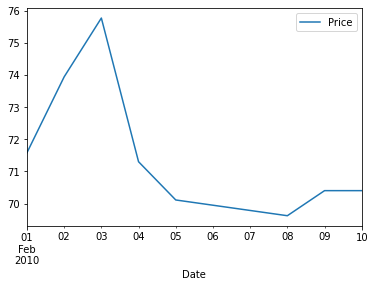

In [64]:
df7.plot()

<AxesSubplot:xlabel='Date'>

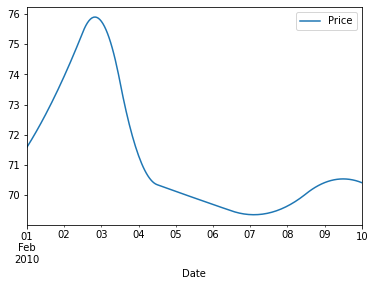

In [65]:
df8 = df4.resample('H').interpolate(method='polynomial', order=2)
df8.plot()